##**Libraries import**

In [509]:
import pandas as pd
import matplotlib.pyplot as plt

In [510]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
import warnings
warnings.filterwarnings("ignore")

In [511]:
!pip install catboost

In [512]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

##**Data import and cleaning**



###**Import data**

In [513]:
df = pd.read_csv("/content/drive/MyDrive/[Swiss Coding] - Final Project - Phương/CarPrice_Assignment.csv")

In [514]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Checking some rows

In [515]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


###**Check missing values and data types**

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [517]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


###**Check duplicate and null values**

In [518]:
df.duplicated().sum()

0

In [519]:
df.isna().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


###**Create Company column**

Car name is formed by **the name of the company** + **space** + **the model of the car**.
For easier analysis, CarName column will separated into 2 columns: Company & Model

In [520]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [521]:
new=df['CarName'].str.split(' ', n=1, expand=True)

In [522]:
new

,0,1
0,alfa-romero,giulia
1,alfa-romero,stelvio
2,alfa-romero,Quadrifoglio
3,audi,100 ls
4,audi,100ls
...,...,...
200,volvo,145e (sw)
201,volvo,144ea
202,volvo,244dl
203,volvo,246


In [523]:
df['Company']=new[0]
df['Model']=new[1]

**Check 5 first rows to make sure CarName splitted correctly**

In [524]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [525]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**There are some car companies misspelled, let's correct them.**

In [526]:
df.replace({'Company': {'maxda': 'mazda'
                  ,'porcshce': 'porsche'
                  ,'toyouta' : 'toyota'
                  ,'vokswagen': 'volkswagen'
                  ,'vw': 'volkswagen'}}, inplace=True)

In [527]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [528]:
df['Company']=df['Company'].str.title()

In [529]:
df['Company'].unique()

array(['Alfa-Romero', 'Audi', 'Bmw', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Mazda', 'Buick', 'Mercury', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab',
       'Subaru', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

##**EDA**


###**Categorical columns**

In [530]:
avg_price_company = df.groupby(['Company'])['price'].mean().reset_index()
avg_price_company

,Company,price
0,Alfa-Romero,15498.333333
1,Audi,17859.166714
2,Bmw,26118.750000
3,Buick,33647.000000
4,Chevrolet,6007.000000
5,Dodge,7875.444444
6,Honda,8184.692308
7,Isuzu,8916.500000
8,Jaguar,34600.000000
9,Mazda,10652.882353


In [531]:
avg_price_company=avg_price_company.sort_values(by='price', ascending=False)

<Axes: xlabel='price', ylabel='Company'>

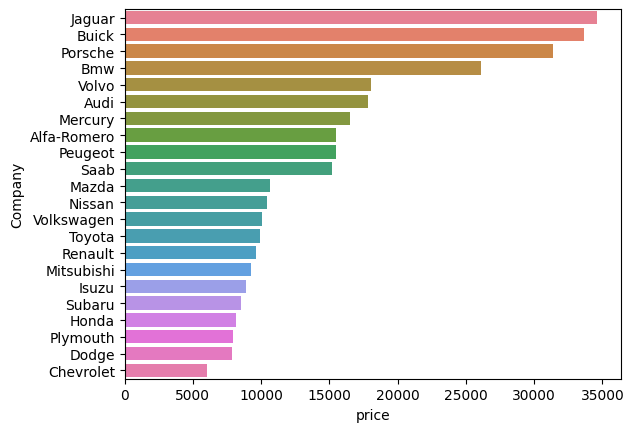

In [532]:
sns.barplot(avg_price_company, x="price", y="Company",hue='Company')

It can be seen that there is a difference in average price between car brands:

Top-notch car group: Jaguar, Buick, Porsche and BMW.

High-average car group: Volvo, Audi, Mercury, Alfa-Romero, Peugeot, Saab.

Affordable car group: Mazda, Nissan, Volkswagen,...

In [533]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="rocket",order=df[cols].value_counts().index)
    plt.title(f"{cols} count",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=df,palette="rocket")
    plt.title(f"Price vs {cols}",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="rocket")
    plt.title(f"Average Price by {cols} ",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

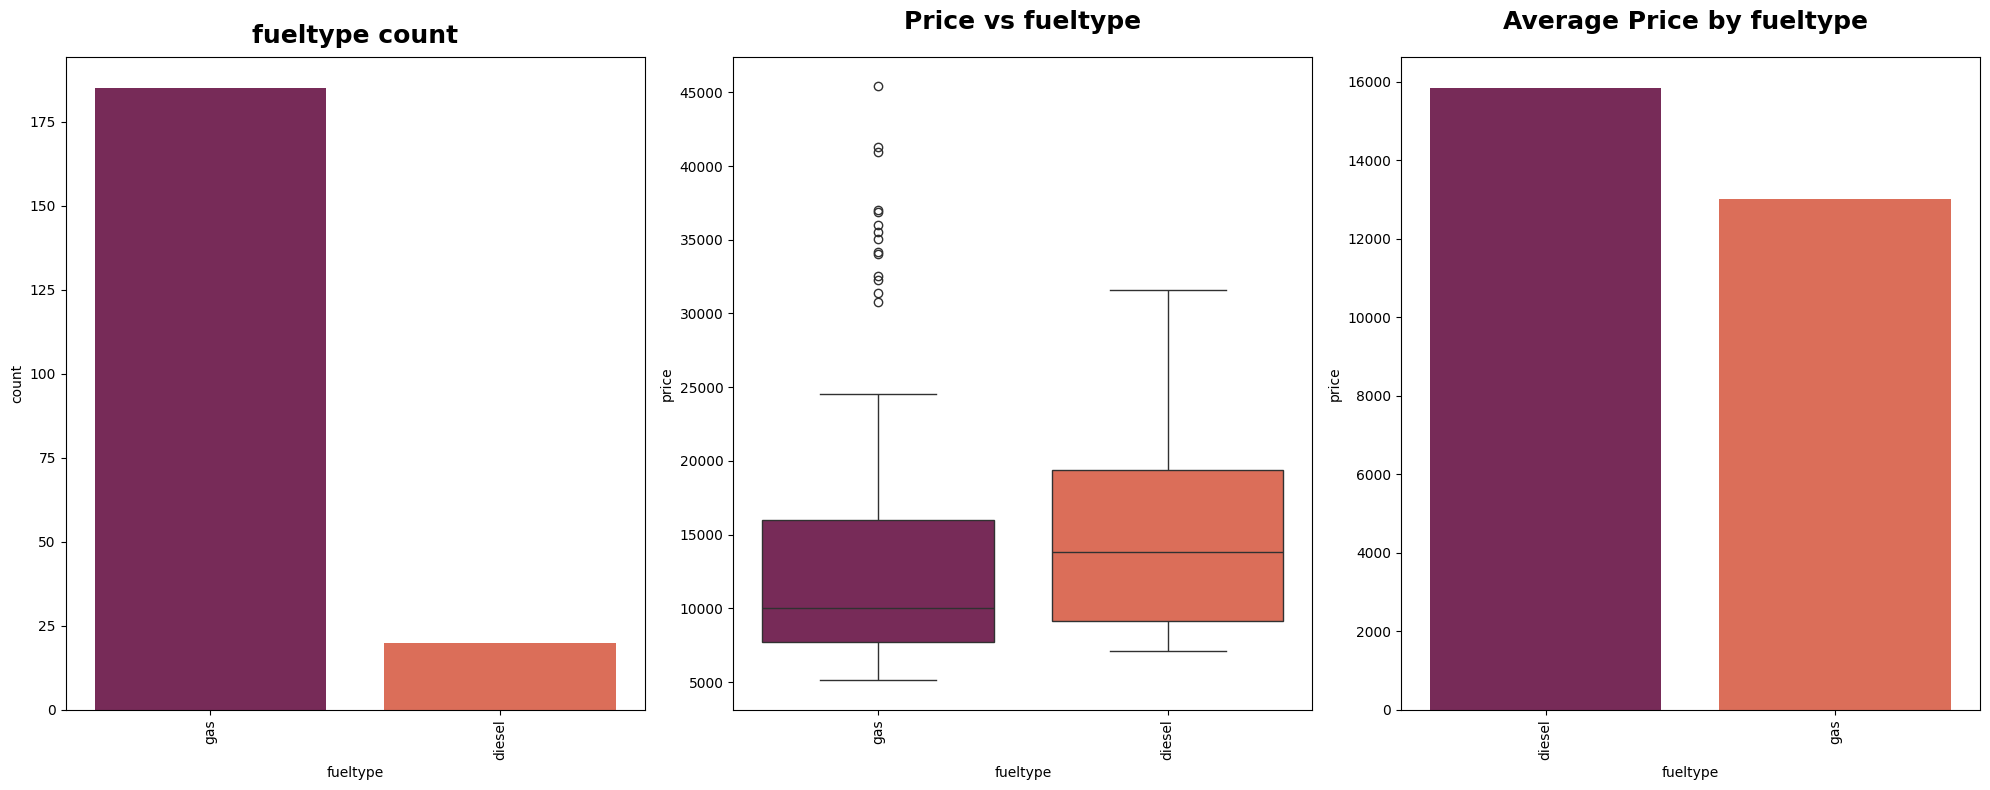

In [534]:
categorical_visualization('fueltype')

The chart indicates that there are many more vehicle models using gas as their fueltype compared to those using diesel.

Some gas-powered cars have very high prices, ranging from 30000$ to 45000$.

However, the average price of gas vehicles is lower than that of diesel vehicles.

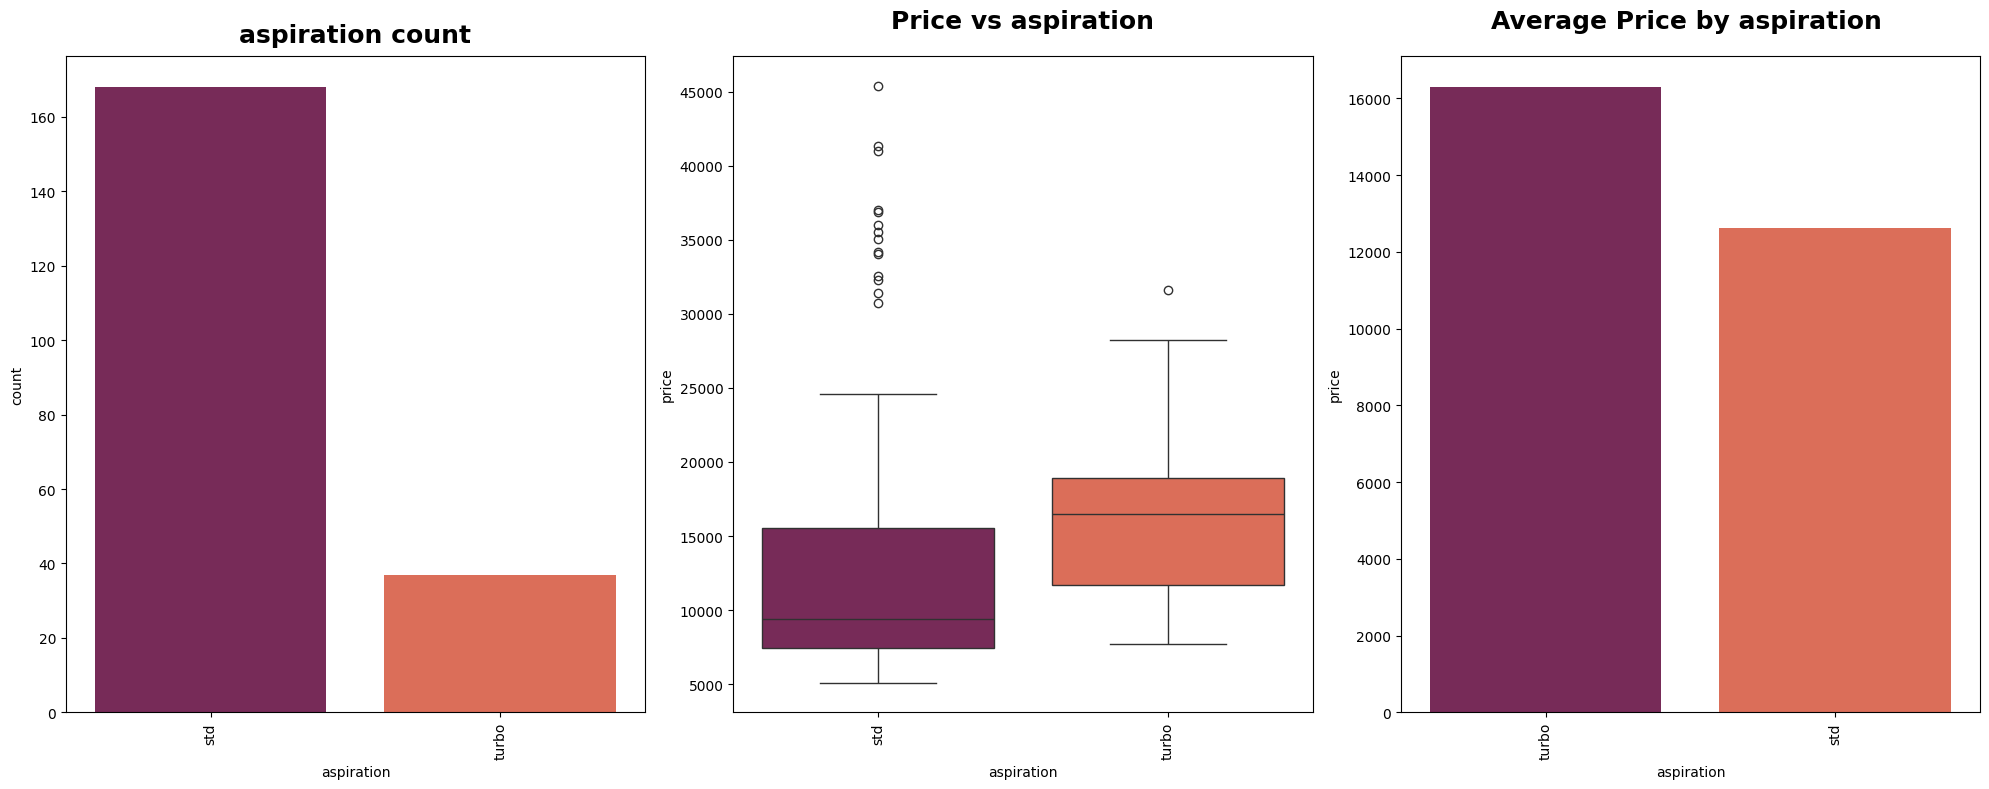

In [535]:
categorical_visualization('aspiration')

STD aspiration has a significantly higher count compared to the Turbo type. This may suggest that std cars are more common than turbo cars.

There are also a few outliers in both categories, indicating that some cars have significantly higher.

The average price of "turbo" cars is higher than that of "std" cars.

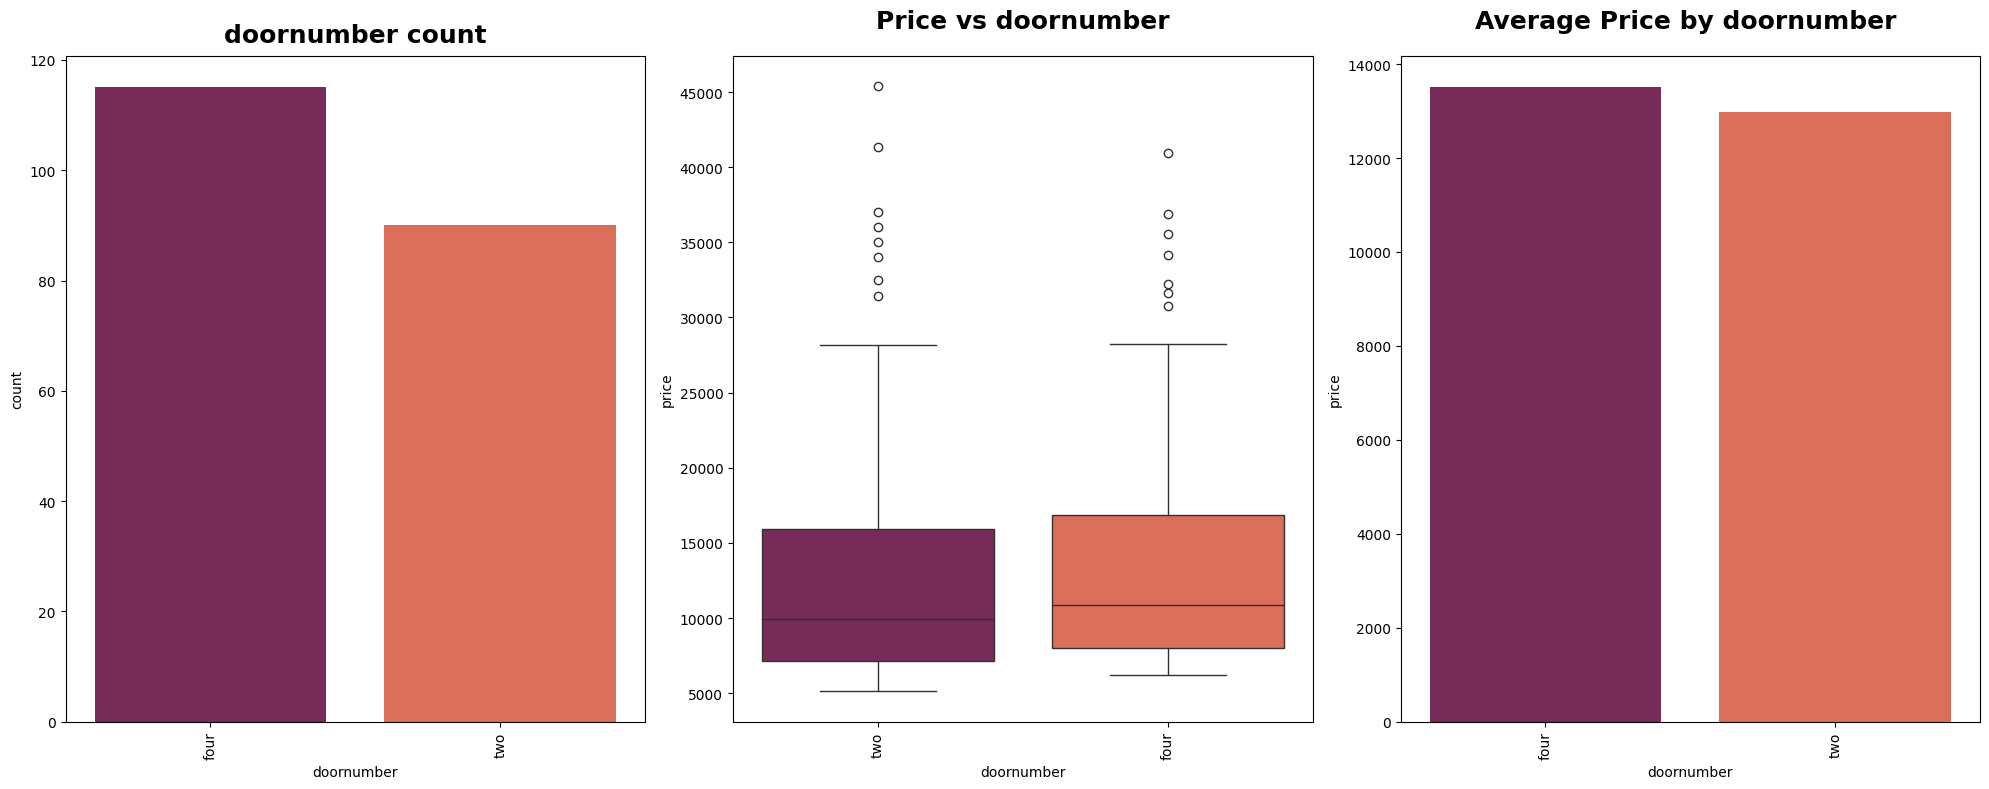

In [536]:
categorical_visualization('doornumber')

The number of four-door vehicle models is greater than that of two-door models, but the difference is not significant.

The two other charts show that there is not much difference in price between two-door and four-door vehicles.

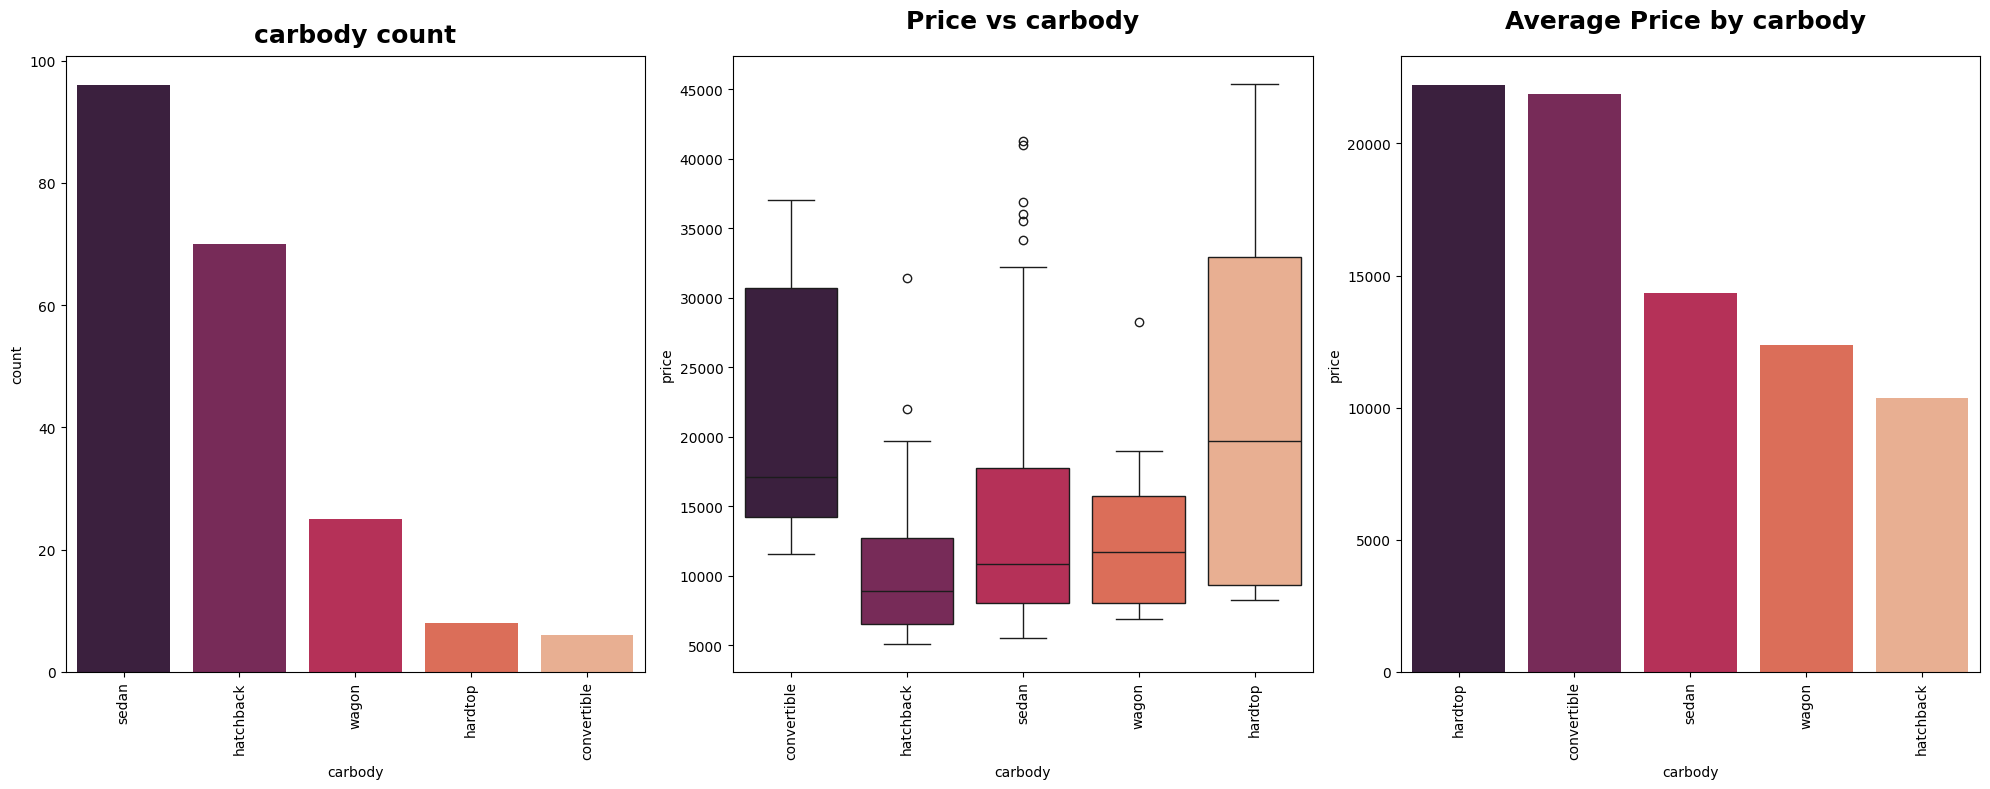

In [537]:
categorical_visualization('carbody')

The "sedan" type has the highest count, followed by "hatchback," making these two the most common body types. "wagon," "hardtop," and "convertible" types have significantly lower counts.

"Convertible" and "hardtop" cars have a higher median price, with "hardtop" displaying the widest price range. "Hatchback" cars have the lowest median price, and they are generally cheaper than other body types.

The average price is highest for "hardtop" cars, followed by "convertible" cars. "Hatchback" cars have the lowest average price.

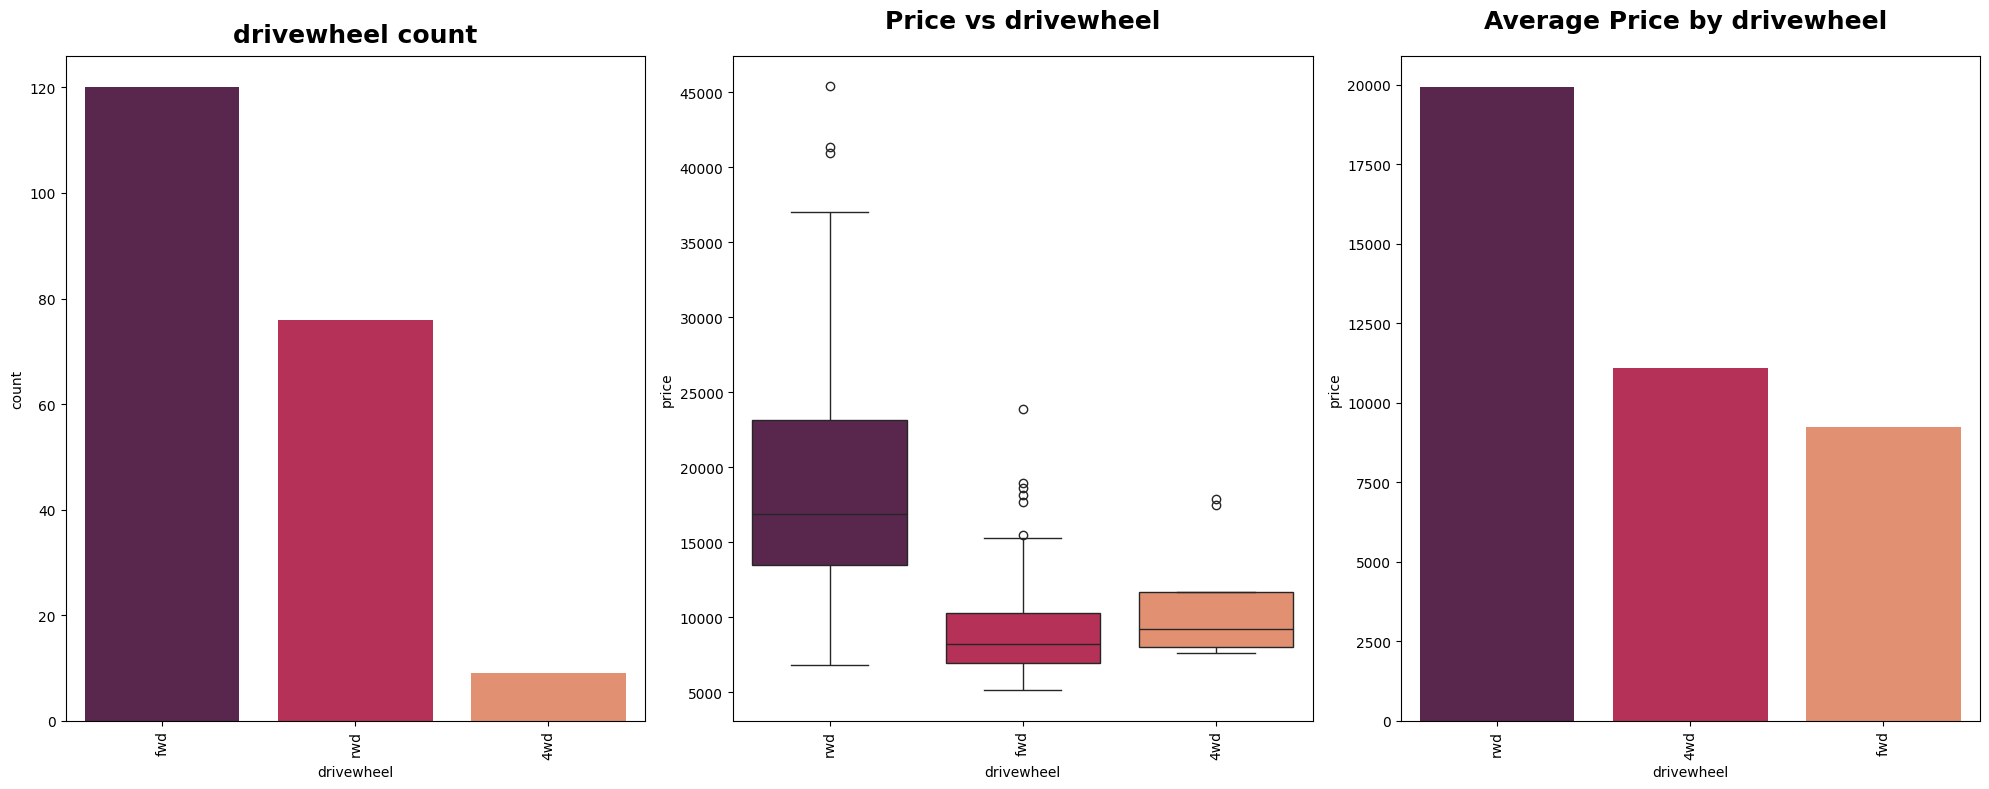

In [538]:
categorical_visualization('drivewheel')

"FWD" is the most common drive wheel type, followed by "RWD". "4WD" is the least common.

"RWD" has the highest median price and the widest price range, suggesting that rear-wheel-drive vehicles tend to be more expensive.

The average price is highest for "RWD" vehicles, followed by "FWD," with "4WD" having the lowest average price.

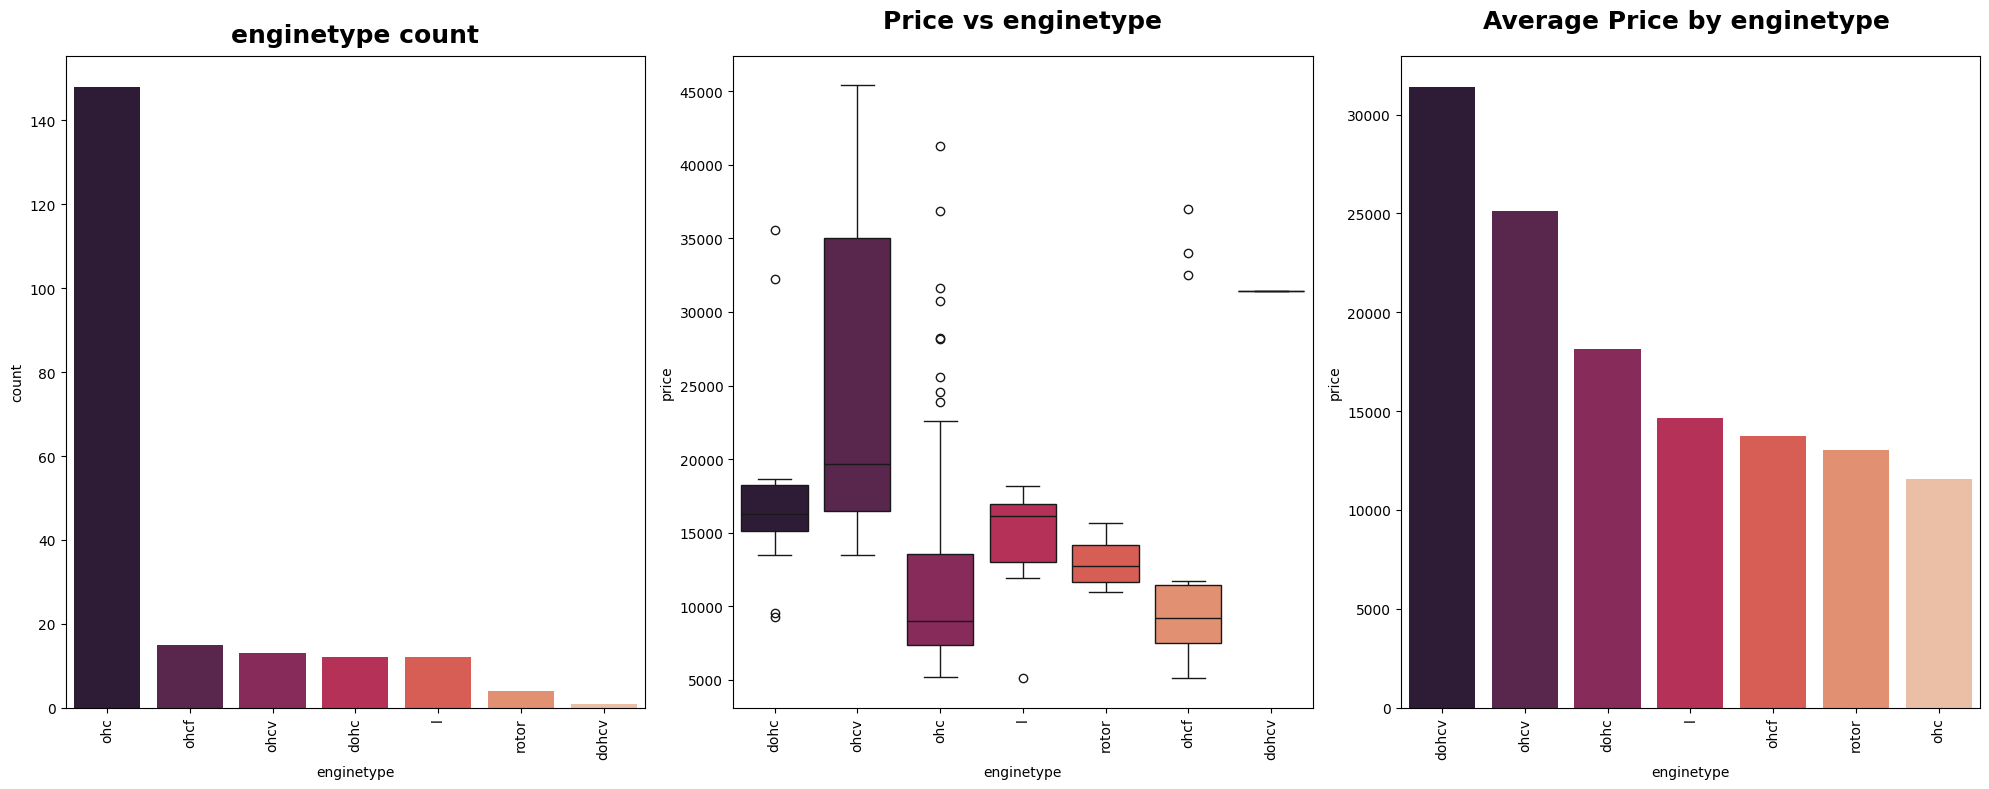

In [539]:
categorical_visualization('enginetype')

The majority of cars have the "ohc" engine type, which significantly outnumbers all other engine types. This shows that "ohc" engines are the most common in this dataset.

Engine type appears to correlate with price, with "dohcv" and "ohcv" engines indicating higher-value cars, while "ohc" engines are more common and generally more affordable.



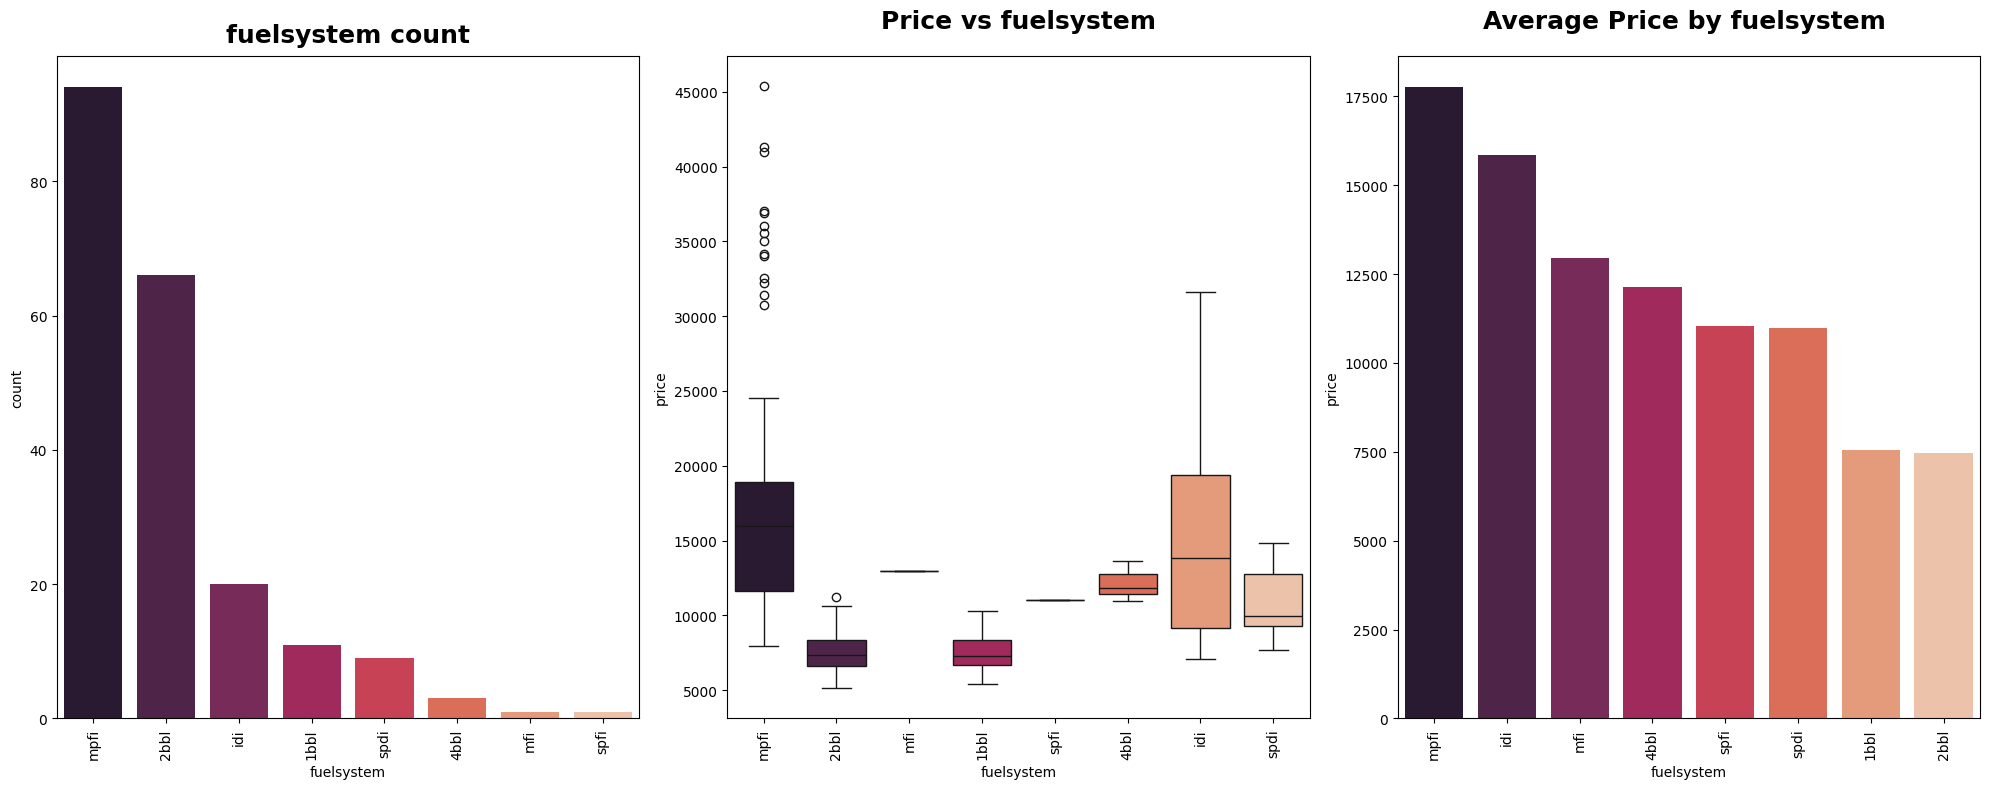

In [540]:
categorical_visualization('fuelsystem')

The "mpfi" fuel system is the most common, followed by "2bbl".

The box plot reveals that "mpfi" has the highest price range, with a considerable number of high-value outliers, suggesting that it’s often associated with more expensive vehicles. The "idi" and "spdi" fuel systems have relatively lower median prices but exhibit some price variability. The "2bbl" system has a much narrower and lower price range.

The "mpfi" fuel system is both the most common and associated with higher-priced cars, while "2bbl" is common but linked to lower-cost cars.

**Overall Conclusion in EDA**

In the categorical columns, the "doornumber" feature appears to have no impact on price differences among types. It might be worth considering removing this feature when constructing regression models.

###**Correlation**

In [541]:
correlation_matrix = df.corr(numeric_only=True)

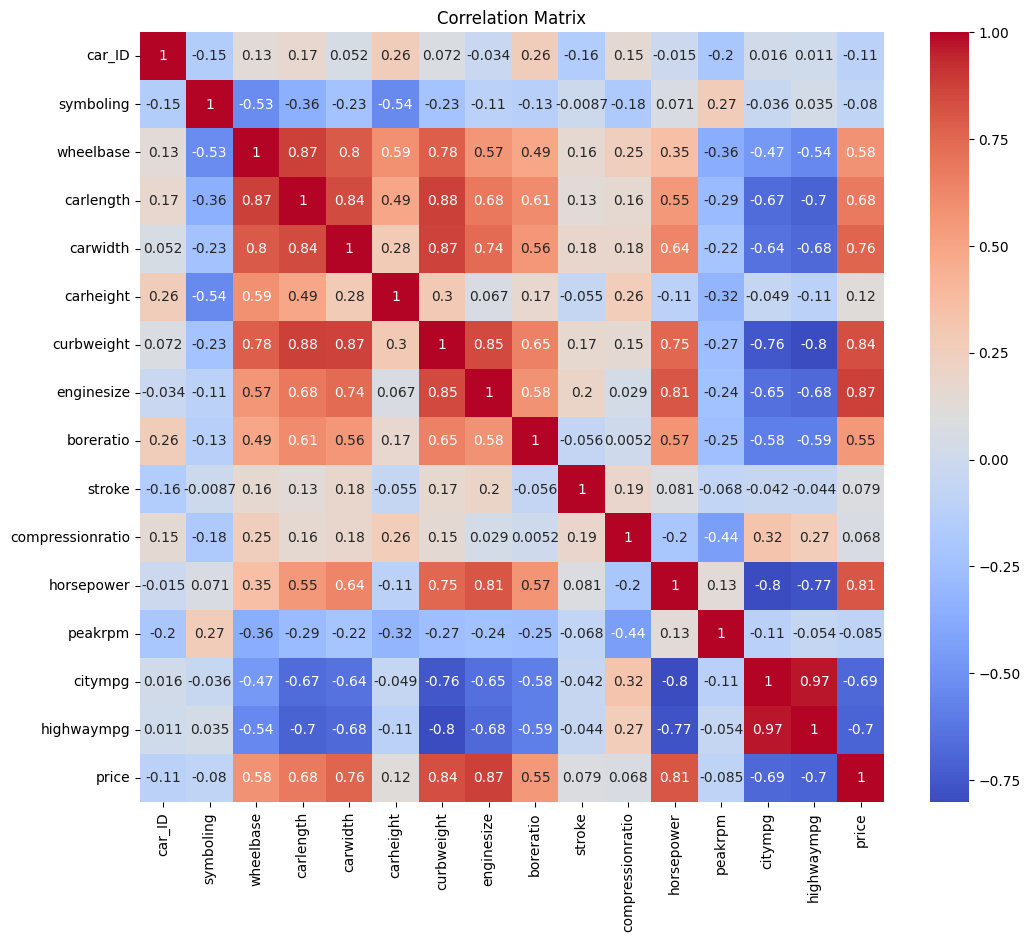

In [542]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Car_ID column seem not useful. Let's delete it from the dataframe and run correlation again.

In [543]:
del df['car_ID']

In [544]:
correlation_matrix = df.corr(numeric_only=True)

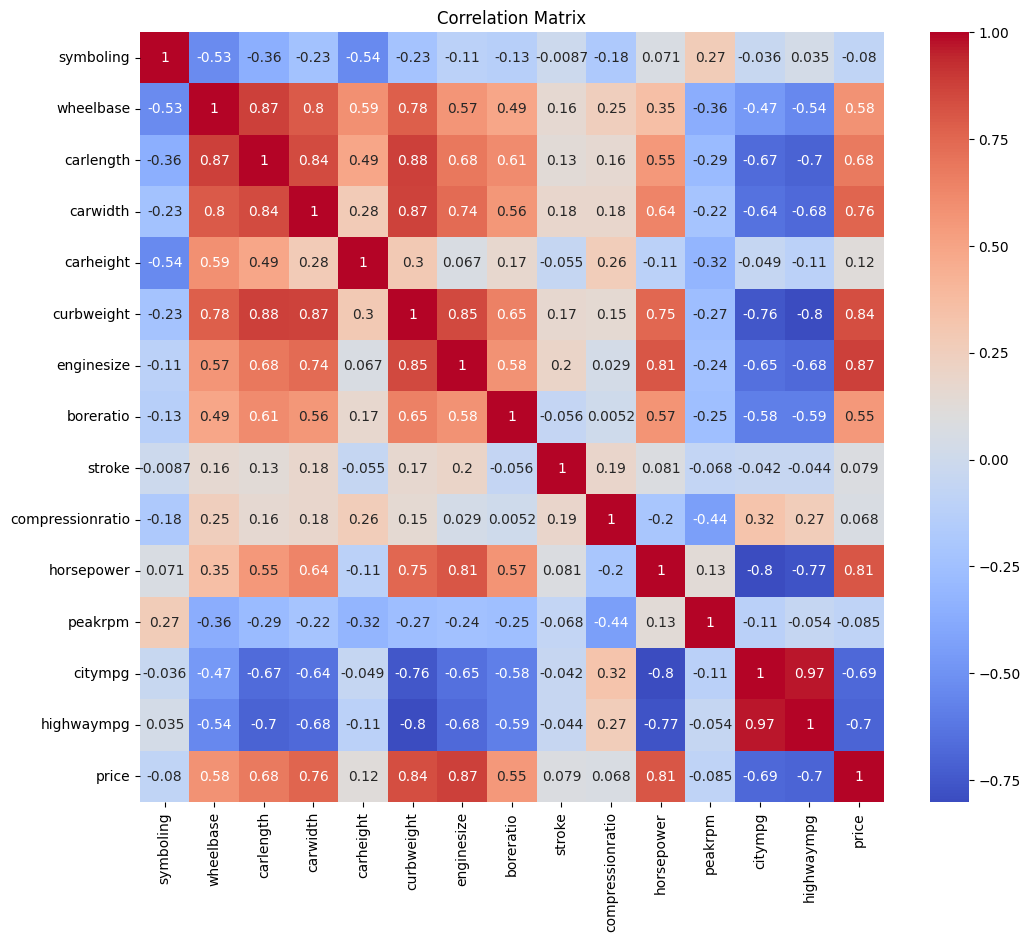

In [545]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In numerical columns:


*   symboling, carheight, stroke, compressionratio, peakrpm columns seem not to have any correlation with price.


**Let's create a new dataframe without cols seem not to have any influence on price**

In [546]:
numerical_cols = df[['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']]

In [547]:
numerical_cols.head(3)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0


In [548]:
categorical_cols = df[['CarName','Model','Company','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype',
                       'cylindernumber','fuelsystem']]

In [549]:
categorical_cols.head(3)

,CarName,Model,Company,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,giulia,Alfa-Romero,gas,std,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,stelvio,Alfa-Romero,gas,std,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,Quadrifoglio,Alfa-Romero,gas,std,hatchback,rwd,front,ohcv,six,mpfi


In [550]:
df2 = df[['price','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg'
,'fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']]

In [551]:
df2.head(2)

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,gas,std,convertible,rwd,front,dohc,four,mpfi
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,gas,std,convertible,rwd,front,dohc,four,mpfi


In [552]:
df2['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [553]:
df2.replace({'cylindernumber': {'four': 4
                                ,'six': 6
                                ,'five' : 5
                                ,'three': 3
                                ,'twelve': 12
                                ,'two': 2
                                ,'eight': 8}}, inplace=True)

In [554]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   wheelbase       205 non-null    float64
 2   carlength       205 non-null    float64
 3   carwidth        205 non-null    float64
 4   curbweight      205 non-null    int64  
 5   enginesize      205 non-null    int64  
 6   boreratio       205 non-null    float64
 7   horsepower      205 non-null    int64  
 8   citympg         205 non-null    int64  
 9   highwaympg      205 non-null    int64  
 10  fueltype        205 non-null    object 
 11  aspiration      205 non-null    object 
 12  carbody         205 non-null    object 
 13  drivewheel      205 non-null    object 
 14  enginelocation  205 non-null    object 
 15  enginetype      205 non-null    object 
 16  cylindernumber  205 non-null    int64  
 17  fuelsystem      205 non-null    obj

In [555]:
df2.columns

Index(['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

##**Data Processing**

In [556]:
one_hot_coded = pd.get_dummies(df2[['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']])

In [557]:
new_df2 = pd.get_dummies(df2,columns = ['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem'])

In [558]:
new_df2.head(5)

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,False,False,False,False,False,False,False,True,False,False
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,False,False,False,False,False,False,False,True,False,False
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,19,26,...,True,False,False,False,False,False,False,True,False,False
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,24,30,...,False,False,False,False,False,False,False,True,False,False
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,18,22,...,False,False,False,False,False,False,False,True,False,False


In [559]:
new_df2.columns

Index(['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'cylindernumber', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [560]:
scaler = StandardScaler()

In [561]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']


In [562]:
new_df2[num_cols] = scaler.fit_transform(new_df2[num_cols])

In [563]:
x = new_df2.drop(columns=["price"])
y = new_df2["price"]

In [564]:
x.shape

(205, 39)

In [565]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [566]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (164, 39)
x_test - >   (41, 39)
y_train - >   (164,)
y_test - >   (41,)


In [567]:
x_train.head(2)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,cylindernumber,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,1.022697,0.077250,0.089812,0.278074,0.170739,0.371023,-0.814171,0.885740,1.200761,4,...,False,False,False,False,False,True,False,False,False,False
111,1.522109,1.027916,1.164596,1.000049,-0.166277,0.482059,-0.231119,-0.953012,-0.982764,4,...,False,False,False,False,False,False,False,True,False,False


In [568]:
x_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'cylindernumber',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [569]:
x_train.shape[0]

164

#**Model building with EDA df**

Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

where:

n = count of rows in your dataset used for train or test

p = count of independent variables

In [570]:
training_r2score = []
testing_r2score = []
training_adj_r2score = []
testing_adj_r2score = []

In [571]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    c = (1-((1-a/100)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1))*100
    d = (1-((1-b/100)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))*100
    training_r2score.append(a)
    testing_r2score.append(b)
    training_adj_r2score.append(c)
    testing_adj_r2score.append(d)

    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    print(f"adj_r2_Score of {model} model on Training Data is:",c)
    print(f"adj_r2_Score of {model} model on Testing Data is:",d)


**Linear Regression Model**


In [572]:
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 92.24294867152291
r2_Score of LinearRegression() model on Testing Data is: 79.98825274261449
adj_r2_Score of LinearRegression() model on Training Data is: 89.80323091498576
adj_r2_Score of LinearRegression() model on Testing Data is: -700.4698902954201


In [573]:
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.86411858417942
r2_Score of DecisionTreeRegressor() model on Testing Data is: 91.58073090466748
adj_r2_Score of DecisionTreeRegressor() model on Training Data is: 99.8213816872681
adj_r2_Score of DecisionTreeRegressor() model on Testing Data is: -236.77076381330107


In [574]:
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.61707588778802
r2_Score of RandomForestRegressor() model on Testing Data is: 95.57781816916994
adj_r2_Score of RandomForestRegressor() model on Training Data is: 98.18212394926974
adj_r2_Score of RandomForestRegressor() model on Testing Data is: -76.88727323320208


In [575]:
model_prediction(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 95.24077901591063
r2_Score of AdaBoostRegressor() model on Testing Data is: 90.97004663903687
adj_r2_Score of AdaBoostRegressor() model on Training Data is: 93.74392725478575
adj_r2_Score of AdaBoostRegressor() model on Testing Data is: -261.1981344385255


In [576]:
model_prediction(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 99.30904972716513
r2_Score of GradientBoostingRegressor() model on Testing Data is: 92.30436681386823
adj_r2_Score of GradientBoostingRegressor() model on Training Data is: 99.09173472199933
adj_r2_Score of GradientBoostingRegressor() model on Testing Data is: -207.8253274452707


In [577]:
model_prediction(LGBMRegressor())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 299
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 19
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [578]:
model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on Training Data is: 99.8640378394656
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_r

In [579]:
model_prediction(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x793f582e6a70> model on Training Data is: 99.68998900316221
r2_Score of <catboost.core.CatBoostRegressor object at 0x793f582e6a70> model on Testing Data is: 94.76788930595897
adj_r2_Score of <catboost.core.CatBoostRegressor object at 0x793f582e6a70> model on Training Data is: 99.59248554447937
adj_r2_Score of <catboost.core.CatBoostRegressor object at 0x793f582e6a70> model on Testing Data is: -109.28442776164103


In [580]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost","LGBM","XGBoost","CatBoost"]

In [581]:
result_1 = pd.DataFrame({"Algorithms":models,
                   "Training R2_Score":training_r2score,
                   "Testing R2_Score":testing_r2score,
                   "Training adjusted_R2_Score":training_adj_r2score,
                   "Testing adjusted_R2_Score":testing_adj_r2score     }

                        )

In [582]:
result_1

,Algorithms,Training R2_Score,Testing R2_Score,Training adjusted_R2_Score,Testing adjusted_R2_Score
0,Linear Regression,92.242949,79.988253,89.803231,-700.469890
1,Decision Tree,99.864119,91.580731,99.821382,-236.770764
2,Random Forest,98.617076,95.577818,98.182124,-76.887273
3,Ada Boost,95.240779,90.970047,93.743927,-261.198134
4,Gradient Boost,99.309050,92.304367,99.091735,-207.825327
5,LGBM,95.130191,85.666847,93.598557,-473.326116
6,XGBoost,99.864038,92.744695,99.821276,-190.212206
7,CatBoost,99.689989,94.767889,99.592486,-109.284428


#**RFE**

In [583]:
df3 = df.copy()

In [584]:
df3.head(3)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,Alfa-Romero,giulia
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,Alfa-Romero,stelvio
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,Alfa-Romero,Quadrifoglio


In [585]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [586]:
del df3['Company']
del df3['Model']
del df3['CarName']

In [587]:
one_hot_coded = pd.get_dummies(df3[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']])

In [588]:
new_df3 = pd.get_dummies(df3,columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'])

In [589]:
new_df3.head(1)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False


In [590]:
new_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

In [591]:
num_cols = ['symboling','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','stroke','horsepower','peakrpm',
            'citympg','highwaympg']

In [592]:
new_df3[num_cols] = scaler.fit_transform(new_df3[num_cols])

In [593]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)
from sklearn.feature_selection import RFE

In [594]:
x1 = new_df3.drop(columns=["price"])
y1 = new_df3["price"]

In [595]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [596]:
n_features_to_select = 20
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(x1_train, y1_train)

RFE(estimator=RandomForestRegressor(max_depth=10), n_features_to_select=20)

In [597]:
from operator import itemgetter
features = x1_train.columns.to_list()
for x1, y1 in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x1, y1)

1 symboling
1 wheelbase
1 carlength
1 carwidth
1 carheight
1 curbweight
1 enginesize
1 boreratio
1 stroke
1 compressionratio
1 horsepower
1 peakrpm
1 citympg
1 highwaympg
1 aspiration_std
1 carbody_convertible
1 carbody_hardtop
1 carbody_hatchback
1 carbody_sedan
1 fuelsystem_mpfi
2 enginetype_ohc
3 cylindernumber_four
4 drivewheel_fwd
5 drivewheel_rwd
6 fuelsystem_2bbl
7 doornumber_four
8 aspiration_turbo
9 carbody_wagon
10 doornumber_two
11 cylindernumber_six
12 enginetype_ohcv
13 drivewheel_4wd
14 enginetype_dohc
15 enginetype_l
16 fueltype_gas
17 fuelsystem_spdi
18 cylindernumber_eight
19 fueltype_diesel
20 cylindernumber_five
21 enginetype_ohcf
22 fuelsystem_4bbl
23 fuelsystem_idi
24 enginetype_dohcv
25 enginelocation_front
26 fuelsystem_spfi
27 fuelsystem_1bbl
28 cylindernumber_twelve
29 fuelsystem_mfi
30 cylindernumber_two
31 enginelocation_rear
32 enginetype_rotor
33 cylindernumber_three


Create a new dataframe with top 15 high-ranking features only.

In [598]:
#df4 = new_df3[['price', 'symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio'
#,'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','enginetype_ohc','carbody_hatchback',
#'aspiration_std',
#'drivewheel_rwd',
#'carbody_sedan']]

In [599]:
df4 = new_df3[['price','symboling'
,'wheelbase'
,'carlength'
,'carwidth'
,'carheight'
,'curbweight'
,'enginesize'
,'boreratio'
,'stroke'
,'compressionratio'
,'horsepower'
,'peakrpm'
,'citympg'
,'highwaympg'
,'aspiration_std'
,'carbody_convertible'
,'carbody_hatchback'
,'carbody_sedan'
,'drivewheel_rwd'
,'enginetype_ohc']]

In [600]:
df4.head(3)

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,horsepower,peakrpm,citympg,highwaympg,aspiration_std,carbody_convertible,carbody_hatchback,carbody_sedan,drivewheel_rwd,enginetype_ohc
0,13495.0,1.743470,-1.690772,-0.426521,-0.844782,48.8,-0.014566,0.074449,0.519071,-1.839377,...,0.174483,-0.26296,-0.646553,-0.546059,True,True,False,False,True,False
1,16500.0,1.743470,-1.690772,-0.426521,-0.844782,48.8,-0.014566,0.074449,0.519071,-1.839377,...,0.174483,-0.26296,-0.646553,-0.546059,True,True,False,False,True,False
2,16500.0,0.133509,-0.708596,-0.231513,-0.190566,52.4,0.514882,0.604046,-2.404880,0.685946,...,1.264536,-0.26296,-0.953012,-0.691627,True,False,True,False,True,False


In [601]:
x2 = df4.drop(columns=["price"])
y2 = df4["price"]

In [602]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=42)

In [603]:
training_r2score2 = []
testing_r2score2 = []
training_adj_r2score2 = []
testing_adj_r2score2 = []

In [604]:
training_r2score2 = []
testing_r2score2 = []
training_adj_r2score2 = []
testing_adj_r2score2 = []
def model_prediction2(model):
    model.fit(x2_train,y2_train)
    x2_train_pred = model.predict(x2_train)
    x2_test_pred = model.predict(x2_test)
    a2 = r2_score(y2_train,x2_train_pred)*100
    b2 = r2_score(y2_test,x2_test_pred)*100
    c2 = (1-((1-a2/100)*(x2_train.shape[0]-1))/(x2_train.shape[0]-x2_train.shape[1]-1))*100
    d2 = (1-((1-b2/100)*(x2_test.shape[0]-1))/(x2_test.shape[0]-x2_test.shape[1]-1))*100
    training_r2score2.append(a2)
    testing_r2score2.append(b2)
    training_adj_r2score2.append(c2)
    testing_adj_r2score2.append(d2)

    print(f"r2_Score of {model} model on Training Data is:",a2)
    print(f"r2_Score of {model} model on Testing Data is:",b2)
    print(f"adj_r2_Score of {model} model on Training Data is:",c2)
    print(f"adj_r2_Score of {model} model on Testing Data is:",d2)



In [605]:
model_prediction2(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 88.44662407090055
r2_Score of LinearRegression() model on Testing Data is: 82.93130834475858
adj_r2_Score of LinearRegression() model on Training Data is: 86.83076729759993
adj_r2_Score of LinearRegression() model on Testing Data is: 65.86261668951717


In [606]:
model_prediction2(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.86537119069865
r2_Score of DecisionTreeRegressor() model on Testing Data is: 90.39665522732622
adj_r2_Score of DecisionTreeRegressor() model on Training Data is: 99.84654198660056
adj_r2_Score of DecisionTreeRegressor() model on Testing Data is: 80.79331045465243


In [607]:
model_prediction2(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.522779621462
r2_Score of RandomForestRegressor() model on Testing Data is: 95.89765291606618
adj_r2_Score of RandomForestRegressor() model on Training Data is: 98.31617537271543
adj_r2_Score of RandomForestRegressor() model on Testing Data is: 91.79530583213236


In [608]:
model_prediction2(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 95.32784623489397
r2_Score of AdaBoostRegressor() model on Testing Data is: 91.63276483810382
adj_r2_Score of AdaBoostRegressor() model on Training Data is: 94.67439815585816
adj_r2_Score of AdaBoostRegressor() model on Testing Data is: 83.26552967620763


In [609]:
model_prediction2(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 99.3405375637299
r2_Score of GradientBoostingRegressor() model on Testing Data is: 93.08676114284211
adj_r2_Score of GradientBoostingRegressor() model on Training Data is: 99.24830505516064
adj_r2_Score of GradientBoostingRegressor() model on Testing Data is: 86.17352228568423


In [610]:
model_prediction2(LGBMRegressor())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 386
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 19
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [611]:
model_prediction2(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on Training Data is: 99.86527630739329
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_

In [612]:
model_prediction2(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x793f578e4d00> model on Training Data is: 99.73468726094058
r2_Score of <catboost.core.CatBoostRegressor object at 0x793f578e4d00> model on Testing Data is: 93.9778718038861
adj_r2_Score of <catboost.core.CatBoostRegressor object at 0x793f578e4d00> model on Training Data is: 99.69758058414905
adj_r2_Score of <catboost.core.CatBoostRegressor object at 0x793f578e4d00> model on Testing Data is: 87.9557436077722


In [613]:
result_2 = pd.DataFrame({"Algorithms":models,
                   "Training R2_Score":training_r2score2,
                   "Testing R2_Score":testing_r2score2,
                   "Training adjusted_R2_Score":training_adj_r2score2,
                   "Testing adjusted_R2_Score":testing_adj_r2score2     }

                        )

In [614]:
result_2

,Algorithms,Training R2_Score,Testing R2_Score,Training adjusted_R2_Score,Testing adjusted_R2_Score
0,Linear Regression,88.446624,82.931308,86.830767,65.862617
1,Decision Tree,99.865371,90.396655,99.846542,80.793310
2,Random Forest,98.522780,95.897653,98.316175,91.795306
3,Ada Boost,95.327846,91.632765,94.674398,83.265530
4,Gradient Boost,99.340538,93.086761,99.248305,86.173522
5,LGBM,96.097021,86.891098,95.551149,73.782196
6,XGBoost,99.865276,93.786562,99.846434,87.573124
7,CatBoost,99.734687,93.977872,99.697581,87.955744


#**Using VIF**

In [615]:
x2_train_1 = sm.add_constant(x2_train)
model = sm.OLS(y2_train, x2_train.astype(float)).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              237.5
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                    1.12e-99
Time:                        19:26:10   Log-Likelihood:                         -1524.0
No. Observations:                 164   AIC:                                      3088.
Df Residuals:                     144   BIC:                                      3150.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [616]:
vif = pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.astype(float).values, i) for i in range(x2_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,carheight,52.69
12,citympg,28.47
13,highwaympg,23.58
9,compressionratio,22.07
5,curbweight,19.69
14,aspiration_std,12.49
10,horsepower,11.29
2,carlength,10.75
6,enginesize,10.36
1,wheelbase,9.57


In [617]:
x = x2_train.drop(columns=["highwaympg"])

In [618]:
x_train_lm_1 = sm.add_constant(x)

lr_1 = sm.OLS(y2_train, x_train_lm_1.astype(float)).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     57.72
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.43e-57
Time:                        19:26:10   Log-Likelihood:                -1524.2
No. Observations:                 164   AIC:                             3088.
Df Residuals:                     144   BIC:                             3150.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4064.4681   8

In [619]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,carheight,49.60
9,compressionratio,22.05
5,curbweight,19.65
13,aspiration_std,11.18
2,carlength,10.68
10,horsepower,10.01
1,wheelbase,9.47
6,enginesize,9.46
12,citympg,7.23
18,enginetype_ohc,7.00


In [620]:
x = x.drop(columns=["curbweight"])

In [621]:
x_train_lm_2 = sm.add_constant(x)

lr_2 = sm.OLS(y2_train, x_train_lm_2.astype(float)).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     61.35
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.79e-58
Time:                        19:26:10   Log-Likelihood:                -1524.2
No. Observations:                 164   AIC:                             3086.
Df Residuals:                     145   BIC:                             3145.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3995.6373   8

In [622]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,carheight,49.24
8,compressionratio,21.30
12,aspiration_std,10.40
9,horsepower,10.01
2,carlength,9.40
1,wheelbase,9.30
5,enginesize,7.51
17,enginetype_ohc,6.55
11,citympg,6.42
3,carwidth,5.78


In [623]:
x = x.drop(columns=["carheight"])

In [624]:
x_train_lm_3 = sm.add_constant(x)

lr_3 = sm.OLS(y2_train, x_train_lm_3.astype(float)).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           5.90e-59
Time:                        19:26:10   Log-Likelihood:                -1525.4
No. Observations:                 164   AIC:                             3087.
Df Residuals:                     146   BIC:                             3143.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7833.6096   1

In [625]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,horsepower,9.50
2,carlength,9.34
1,wheelbase,8.83
7,compressionratio,8.04
4,enginesize,7.17
11,aspiration_std,6.24
3,carwidth,5.44
10,citympg,5.15
16,enginetype_ohc,5.07
13,carbody_hatchback,4.38


In [626]:
x = x.drop(columns=["carlength"])

In [627]:
x_train_lm_4 = sm.add_constant(x)

lr_4 = sm.OLS(y2_train, x_train_lm_4.astype(float)).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     66.80
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           4.97e-59
Time:                        19:26:10   Log-Likelihood:                -1527.6
No. Observations:                 164   AIC:                             3089.
Df Residuals:                     147   BIC:                             3142.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8140.5907   1

In [628]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,horsepower,9.46
6,compressionratio,7.79
3,enginesize,7.17
1,wheelbase,6.25
10,aspiration_std,6.19
2,carwidth,5.13
15,enginetype_ohc,5.06
9,citympg,4.35
13,carbody_sedan,4.17
14,drivewheel_rwd,4.05


In [629]:
x = x.drop(columns=["boreratio"])

In [630]:
x_train_lm_5 = sm.add_constant(x)

lr_5 = sm.OLS(y2_train, x_train_lm_5.astype(float)).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     71.50
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           7.11e-60
Time:                        19:26:10   Log-Likelihood:                -1527.8
No. Observations:                 164   AIC:                             3088.
Df Residuals:                     148   BIC:                             3137.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8025.2950   1

In [631]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,horsepower,9.26
5,compressionratio,7.78
3,enginesize,7.13
1,wheelbase,6.25
9,aspiration_std,6.19
2,carwidth,5.10
14,enginetype_ohc,5.04
8,citympg,4.26
12,carbody_sedan,4.14
13,drivewheel_rwd,3.82


In [632]:
x = x.drop(columns=["symboling"])

In [633]:
x_train_lm_6 = sm.add_constant(x)

lr_6 = sm.OLS(y2_train, x_train_lm_6.astype(float)).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     76.47
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.38e-60
Time:                        19:26:10   Log-Likelihood:                -1528.4
No. Observations:                 164   AIC:                             3087.
Df Residuals:                     149   BIC:                             3133.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7837.6338   1

In [634]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,horsepower,8.99
4,compressionratio,7.69
2,enginesize,7.08
8,aspiration_std,6.09
13,enginetype_ohc,4.94
1,carwidth,4.93
0,wheelbase,4.84
11,carbody_sedan,4.14
7,citympg,3.99
12,drivewheel_rwd,3.82


In [635]:
x = x.drop(columns=["horsepower"])

In [636]:
x_train_lm_7 = sm.add_constant(x)

lr_7 = sm.OLS(y2_train, x_train_lm_7.astype(float)).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     81.23
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           5.58e-61
Time:                        19:26:11   Log-Likelihood:                -1529.9
No. Observations:                 164   AIC:                             3088.
Df Residuals:                     150   BIC:                             3131.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8450.4101   1

In [637]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,compressionratio,7.58
7,aspiration_std,5.03
12,enginetype_ohc,4.93
1,carwidth,4.77
0,wheelbase,4.14
10,carbody_sedan,4.11
11,drivewheel_rwd,3.56
2,enginesize,3.42
9,carbody_hatchback,3.39
6,citympg,3.02


In [638]:
x = x.drop(columns=["wheelbase"])

In [639]:
x_train_lm_8 = sm.add_constant(x)

lr_8 = sm.OLS(y2_train, x_train_lm_8.astype(float)).fit()

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     88.57
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           5.88e-62
Time:                        19:26:11   Log-Likelihood:                -1529.9
No. Observations:                 164   AIC:                             3086.
Df Residuals:                     151   BIC:                             3126.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8477.7978   1

In [640]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,compressionratio,7.58
6,aspiration_std,5.01
11,enginetype_ohc,4.92
9,carbody_sedan,4.08
1,enginesize,3.18
10,drivewheel_rwd,3.17
5,citympg,3.01
8,carbody_hatchback,2.90
0,carwidth,2.77
4,peakrpm,1.40


In [641]:
df5=new_df3[['enginetype_ohc','compressionratio','enginesize','citympg','carwidth','peakrpm','stroke','price']]

In [642]:
x3 = df5.drop(columns=["price"])
y3 = df5["price"]

In [643]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.2,random_state=42)

In [644]:
training_r2score3 = []
testing_r2score3 = []
training_adj_r2score3 = []
testing_adj_r2score3 = []
def model_prediction3(model):
    model.fit(x3_train,y3_train)
    x3_train_pred = model.predict(x3_train)
    x3_test_pred = model.predict(x3_test)
    a3 = r2_score(y3_train,x3_train_pred)*100
    b3 = r2_score(y3_test,x3_test_pred)*100
    c3 = (1-((1-a3/100)*(x3_train.shape[0]-1))/(x3_train.shape[0]-x3_train.shape[1]-1))*100
    d3 = (1-((1-b3/100)*(x3_test.shape[0]-1))/(x3_test.shape[0]-x3_test.shape[1]-1))*100
    training_r2score3.append(a3)
    testing_r2score3.append(b3)
    training_adj_r2score3.append(c3)
    testing_adj_r2score3.append(d3)

    print(f"r2_Score of {model} model on Training Data is:",a3)
    print(f"r2_Score of {model} model on Testing Data is:",b3)
    print(f"adj_r2_Score of {model} model on Training Data is:",c3)
    print(f"adj_r2_Score of {model} model on Testing Data is:",d3)

In [645]:
model_prediction3(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 85.92811233203797
r2_Score of LinearRegression() model on Testing Data is: 79.29536889529474
adj_r2_Score of LinearRegression() model on Training Data is: 85.29668147514224
adj_r2_Score of LinearRegression() model on Testing Data is: 74.90347744884211


In [646]:
model_prediction3(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 98.68931630942761
r2_Score of DecisionTreeRegressor() model on Testing Data is: 90.21137668440781
adj_r2_Score of DecisionTreeRegressor() model on Training Data is: 98.63050357972244
adj_r2_Score of DecisionTreeRegressor() model on Testing Data is: 88.13500204170643


In [647]:
model_prediction3(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 97.66690914995344
r2_Score of RandomForestRegressor() model on Testing Data is: 94.94156105976546
adj_r2_Score of RandomForestRegressor() model on Training Data is: 97.56221917591289
adj_r2_Score of RandomForestRegressor() model on Testing Data is: 93.86855886032178


In [648]:
model_prediction3(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 93.48631833229348
r2_Score of AdaBoostRegressor() model on Testing Data is: 90.67333050999352
adj_r2_Score of AdaBoostRegressor() model on Training Data is: 93.19403774463999
adj_r2_Score of AdaBoostRegressor() model on Testing Data is: 88.69494607271942


In [649]:
model_prediction3(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 98.08048938241024
r2_Score of GradientBoostingRegressor() model on Testing Data is: 92.10968550721176
adj_r2_Score of GradientBoostingRegressor() model on Training Data is: 97.9943574957235
adj_r2_Score of GradientBoostingRegressor() model on Testing Data is: 90.43598243298396


In [650]:
model_prediction3(LGBMRegressor())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 7
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [651]:
model_prediction3(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on Training Data is: 98.68930429107236
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_

In [652]:
model_prediction3(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x793f54867a90> model on Training Data is: 98.60554449093935
r2_Score of <catboost.core.CatBoostRegressor object at 0x793f54867a90> model on Testing Data is: 90.78409055472795
adj_r2_Score of <catboost.core.CatBoostRegressor object at 0x793f54867a90> model on Training Data is: 98.54297276937895
adj_r2_Score of <catboost.core.CatBoostRegressor object at 0x793f54867a90> model on Testing Data is: 88.82920067239752


In [653]:
result_1

,Algorithms,Training R2_Score,Testing R2_Score,Training adjusted_R2_Score,Testing adjusted_R2_Score
0,Linear Regression,92.242949,79.988253,89.803231,-700.469890
1,Decision Tree,99.864119,91.580731,99.821382,-236.770764
2,Random Forest,98.617076,95.577818,98.182124,-76.887273
3,Ada Boost,95.240779,90.970047,93.743927,-261.198134
4,Gradient Boost,99.309050,92.304367,99.091735,-207.825327
5,LGBM,95.130191,85.666847,93.598557,-473.326116
6,XGBoost,99.864038,92.744695,99.821276,-190.212206
7,CatBoost,99.689989,94.767889,99.592486,-109.284428


In [654]:
result_2

,Algorithms,Training R2_Score,Testing R2_Score,Training adjusted_R2_Score,Testing adjusted_R2_Score
0,Linear Regression,88.446624,82.931308,86.830767,65.862617
1,Decision Tree,99.865371,90.396655,99.846542,80.793310
2,Random Forest,98.522780,95.897653,98.316175,91.795306
3,Ada Boost,95.327846,91.632765,94.674398,83.265530
4,Gradient Boost,99.340538,93.086761,99.248305,86.173522
5,LGBM,96.097021,86.891098,95.551149,73.782196
6,XGBoost,99.865276,93.786562,99.846434,87.573124
7,CatBoost,99.734687,93.977872,99.697581,87.955744


In [655]:
result_3 = pd.DataFrame({"Algorithms":models,
                   "Training R2_Score":training_r2score3,
                   "Testing R2_Score":testing_r2score3,
                   "Training adjusted_R2_Score":training_adj_r2score3,
                   "Testing adjusted_R2_Score":testing_adj_r2score3     }

                        )
result_3

,Algorithms,Training R2_Score,Testing R2_Score,Training adjusted_R2_Score,Testing adjusted_R2_Score
0,Linear Regression,85.928112,79.295369,85.296681,74.903477
1,Decision Tree,98.689316,90.211377,98.630504,88.135002
2,Random Forest,97.666909,94.941561,97.562219,93.868559
3,Ada Boost,93.486318,90.673331,93.194038,88.694946
4,Gradient Boost,98.080489,92.109686,97.994357,90.435982
5,LGBM,94.518224,82.588125,94.272247,78.894697
6,XGBoost,98.689304,92.565108,98.630491,90.988009
7,CatBoost,98.605544,90.784091,98.542973,88.829201
